Saving emisi.csv to emisi.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ville (L/100 km)      642 non-null    float64
 1   Route (L/100 km)      642 non-null    float64
 2   kombinasi (L/100 km)  642 non-null    float64
 3   Emisi CO2 (g/km)      642 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 20.2 KB


,Ville (L/100 km),Route (L/100 km),kombinasi (L/100 km),Emisi CO2 (g/km)
0,8.1,6.5,7.4,172
1,8.9,6.5,7.8,181
2,11.1,8.3,9.9,230
3,12.6,9.4,11.2,263
4,13.8,11.2,12.4,291


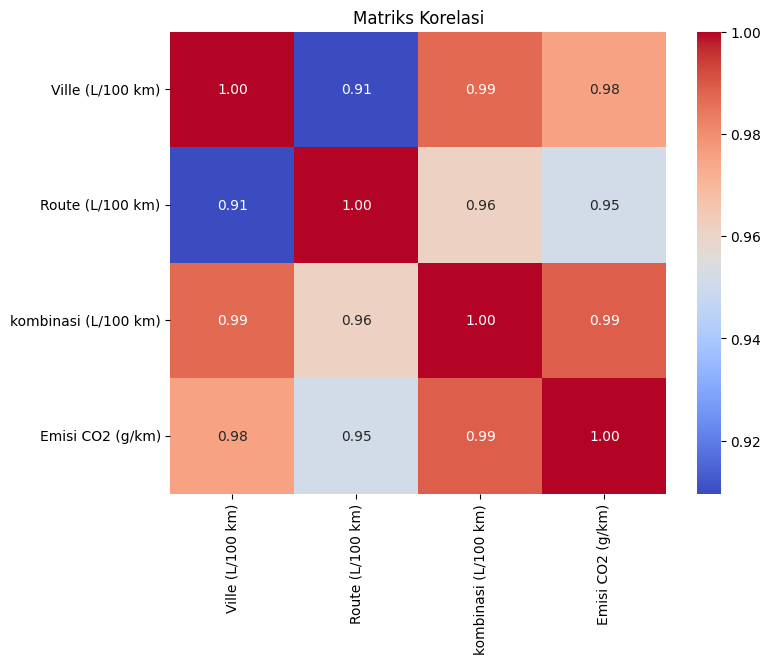

{'Model': 'Linear Regression', 'MAE': 2.6490899015492753, 'MSE': 35.59331113263792, 'RMSE': 5.966013001380229, 'R2 Score': 0.9918141014321566}


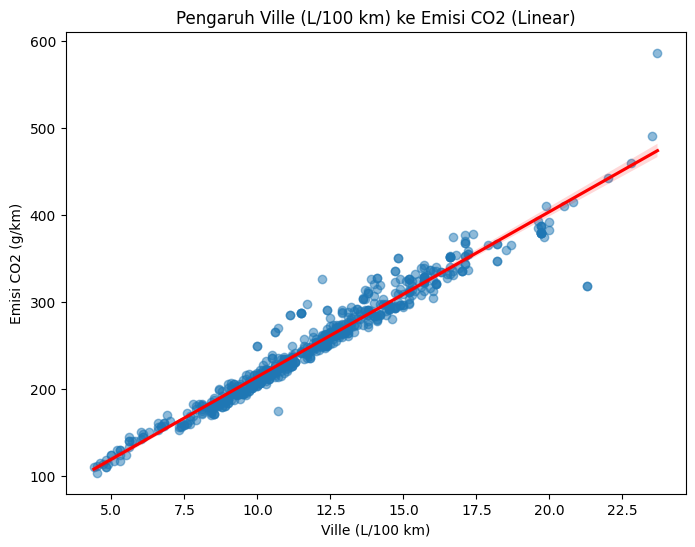

{'Model': 'Polynomial Regression (Degree 2)', 'MAE': 2.718861109265443, 'MSE': 35.104241018048455, 'RMSE': 5.9248832071230275, 'R2 Score': 0.991926579822708}


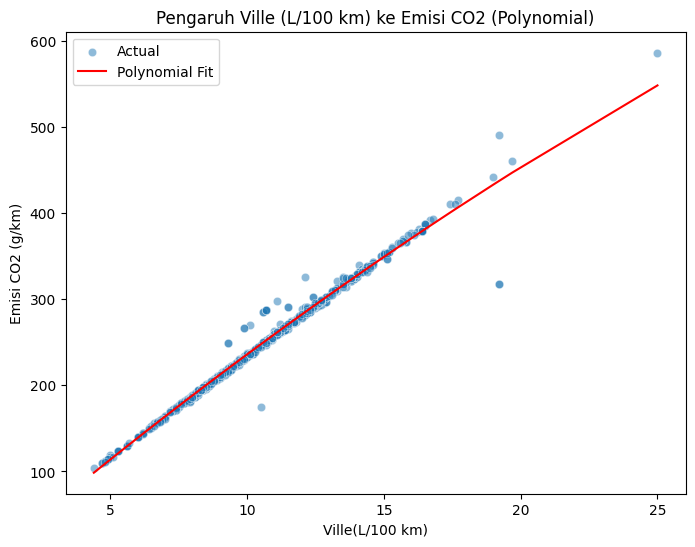

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Import Data dalam format CSV
from google.colab import files
uploaded = files.upload()

# Membaca file CSV (gantilah 'emisi.csv' dengan nama file yang diunggah)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Menampilkan informasi dasar data
df.info()
display(df.head())

# 3. Menghitung Matriks Korelasi
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# 4. Membuat Model Regresi Sederhana (Menggunakan Kombinasi L/100 km sebagai prediktor)
X = df[["kombinasi (L/100 km)"]]
y = df["Emisi CO2 (g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi model regresi linear sederhana
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

result_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
print(result_lr)

# 5. Eksplorasi Pengaruh Ville (L/100 km) ke Emisi CO2
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Ville (L/100 km)"], y=df["Emisi CO2 (g/km)"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Ville (L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Pengaruh Ville (L/100 km) ke Emisi CO2 (Linear)")
plt.show()

# 6. Evaluasi Model (Linear Regression sudah dievaluasi di atas)

# 7. Membuat Model Regresi Polynomial
degree = 2  # Bisa diubah sesuai kebutuhan
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluasi model regresi polynomial
result_poly = evaluate_model(y_test, y_pred_poly, f"Polynomial Regression (Degree {degree})")
print(result_poly)

# Visualisasi hasil Polynomial Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["kombinasi (L/100 km)"], y=y, alpha=0.5, label="Actual")
sns.lineplot(x=X["kombinasi (L/100 km)"].values.flatten(), y=model_poly.predict(poly.fit_transform(X)).flatten(), color='red', label="Polynomial Fit")
plt.xlabel("Ville(L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Pengaruh Ville (L/100 km) ke Emisi CO2 (Polynomial)")
plt.legend()
plt.show()